In [1]:
current_job_id = '009'
checkpoint_name = 'weights.{epoch:02d}-{val_loss:.2f}.hdf5'
filepath = 'saved_models/'
epochs_n = 200
batch_size = 512

In [2]:
import keras 
from keras.models import Sequential
from keras.layers import  Conv2D, MaxPooling2D, Dense, Flatten,Dropout,Activation
from keras.layers import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt 
import numpy as np
from keras import regularizers
from keras.datasets import cifar10
from keras.optimizers import SGD 

(x_train,y_train),(x_test,y_test) = cifar10.load_data()

print('Shape of training dataset :',x_train.shape)
print('Shape of testing dataste :' ,x_test.shape)

#formatting the dataset 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255.
x_test = x_test/255.

y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)


Using MXNet backend


Shape of training dataset : (50000, 3, 32, 32)
Shape of testing dataste : (10000, 3, 32, 32)


In [3]:
rglrzr = None #regularizers.l2(0.0003)
drop_out = 0.3

model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(10))
model.add(Activation('softmax'))


sgd = SGD(lr=0.015, momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer=sgd, metrics=['accuracy'])
datagen = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip = False,
    #validation_split=0.2
    )


# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(x_train)



#add some callbacks:
callbacks = []

checkpoint = keras.callbacks.ModelCheckpoint(filepath=filepath+current_job_id+checkpoint_name, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=5)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=0, mode='auto', min_delta=0.000001, cooldown=0, min_lr=0)
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

callbacks.append(checkpoint)
callbacks.append(reduce_lr)
callbacks.append(early_stopping)

In [4]:
# fits the model on batches with real-time data augmentation:
history = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size), 
                              epochs=epochs_n,
                              validation_data=(x_test,y_test),
                              callbacks = callbacks)

Epoch 1/200


/home/shiqidai1002/anaconda3/lib/python3.7/site-packages/mxnet/module/bucketing_module.py:408: UserWarning: Optimizer created manually outside Module but rescale_grad is not normalized to 1.0/batch_size/num_workers (1.0 vs. 0.001953125). Is this intended?
  force_init=force_init)


98/98 [==============================] - 21s 210ms/step - loss: 2.4339 - acc: 0.1487 - val_loss: 3.1084 - val_acc: 0.1013
Epoch 2/200
98/98 [==============================] - 14s 140ms/step - loss: 1.9821 - acc: 0.2382 - val_loss: 2.2517 - val_acc: 0.1573
Epoch 3/200
98/98 [==============================] - 15s 151ms/step - loss: 1.8523 - acc: 0.2856 - val_loss: 2.0179 - val_acc: 0.2328
Epoch 4/200
98/98 [==============================] - 14s 143ms/step - loss: 1.7847 - acc: 0.3173 - val_loss: 2.0186 - val_acc: 0.2290
Epoch 5/200
98/98 [==============================] - 14s 145ms/step - loss: 1.7185 - acc: 0.3503 - val_loss: 1.7407 - val_acc: 0.3639
Epoch 6/200
98/98 [==============================] - 14s 143ms/step - loss: 1.6226 - acc: 0.3894 - val_loss: 2.5941 - val_acc: 0.2042
Epoch 7/200
98/98 [==============================] - 14s 144ms/step - loss: 1.5172 - acc: 0.4336 - val_loss: 1.6783 - val_acc: 0.3891
Epoch 8/200
98/98 [==============================] - 14s 145ms/step - loss

Epoch 69/200
98/98 [==============================] - 14s 147ms/step - loss: 0.2820 - acc: 0.9026 - val_loss: 0.3998 - val_acc: 0.8735
Epoch 70/200
98/98 [==============================] - 14s 143ms/step - loss: 0.2802 - acc: 0.9036 - val_loss: 0.3986 - val_acc: 0.8744
Epoch 71/200
98/98 [==============================] - 14s 145ms/step - loss: 0.2797 - acc: 0.9030 - val_loss: 0.4016 - val_acc: 0.8741
Epoch 72/200
98/98 [==============================] - 14s 145ms/step - loss: 0.2825 - acc: 0.9015 - val_loss: 0.3998 - val_acc: 0.8738
Epoch 73/200
98/98 [==============================] - 15s 151ms/step - loss: 0.2807 - acc: 0.9039 - val_loss: 0.3987 - val_acc: 0.8750
Epoch 74/200
98/98 [==============================] - 14s 147ms/step - loss: 0.2810 - acc: 0.9030 - val_loss: 0.3991 - val_acc: 0.8749
Epoch 75/200
98/98 [==============================] - 14s 148ms/step - loss: 0.2800 - acc: 0.9036 - val_loss: 0.3989 - val_acc: 0.8749
Epoch 76/200
98/98 [==============================] - 1

10000/10000 [==============================] - 3s 332us/step
[0.39632546342611313, 0.8745]


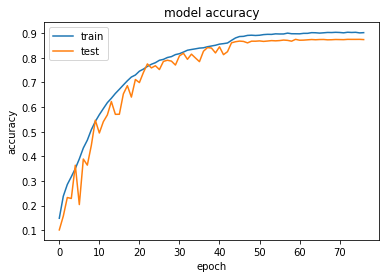

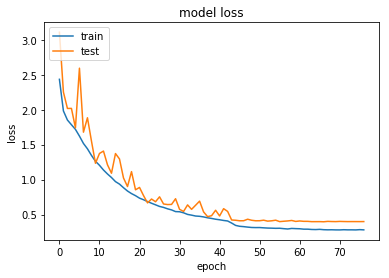

In [5]:
score = model.evaluate(x=x_test,y=y_test)
print(score)

model.save(filepath + current_job_id)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()